In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

File ‘ml-20m.zip’ already there; not retrieving.



In [3]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip


In [4]:
df = pd.read_csv('ml-20m/ratings.csv')

In [5]:
df.userId = pd.Categorical(df.userId)
df['new_user_id']= df.userId.cat.codes

In [6]:
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id']=df.movieId.cat.codes 

In [7]:
user_id = df['new_user_id'].values
movie_id = df['new_movie_id'].values
rating = df['rating'].values

In [8]:
M = len(set(user_id))
N = len(set(movie_id))
K = 10

In [9]:
u = Input(shape=(1,))
m = Input(shape=(1,))
u_emb = Embedding(M, K)(u)
m_emb = Embedding(N, K)(m)
u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)
x = Concatenate()([u_emb, m_emb])
x = Dense(400, activation='relu')(x)
x = Dense(400, activation='relu')(x)
x = Dense(1)(x)
model = Model(inputs=[u, m], outputs = x)

In [10]:
model.compile(
    loss = 'mse',
    optimizer = SGD(lr = 0.04, momentum = 0.9)
)   

In [11]:
user_id, movie_id, rating = shuffle(user_id, movie_id, rating)
N_train = int(0.8*len(rating))
train_user = user_id[:N_train]
train_movie = movie_id[:N_train]
train_rating = rating[:N_train]

test_user = user_id[N_train:]
test_movie = movie_id[N_train:]
test_rating = rating[N_train:]

avg_rating = train_rating.mean()
train_rating = train_rating - avg_rating
test_rating = test_rating - avg_rating

In [12]:
r = model.fit(
    x = [train_user, train_movie],
    y = train_rating,
    epochs = 25,
    batch_size = 1024,
    verbose = 2,
    validation_data=([test_user, test_movie],test_rating),
)

Epoch 1/25
15626/15626 - 99s - loss: 0.7956 - val_loss: 0.7404
Epoch 2/25
15626/15626 - 98s - loss: 0.7157 - val_loss: 0.7060
Epoch 3/25
15626/15626 - 99s - loss: 0.6906 - val_loss: 0.6936
Epoch 4/25
15626/15626 - 98s - loss: 0.6784 - val_loss: 0.6855
Epoch 5/25
15626/15626 - 98s - loss: 0.6671 - val_loss: 0.6779
Epoch 6/25
15626/15626 - 100s - loss: 0.6575 - val_loss: 0.6747
Epoch 7/25
15626/15626 - 99s - loss: 0.6502 - val_loss: 0.6687
Epoch 8/25
15626/15626 - 98s - loss: 0.6434 - val_loss: 0.6648
Epoch 9/25
15626/15626 - 99s - loss: 0.6353 - val_loss: 0.6617
Epoch 10/25
15626/15626 - 97s - loss: 0.6257 - val_loss: 0.6549
Epoch 11/25
15626/15626 - 98s - loss: 0.6143 - val_loss: 0.6473
Epoch 12/25
15626/15626 - 100s - loss: 0.6031 - val_loss: 0.6432
Epoch 13/25
15626/15626 - 98s - loss: 0.5943 - val_loss: 0.6414
Epoch 14/25
15626/15626 - 97s - loss: 0.5869 - val_loss: 0.6387
Epoch 15/25
15626/15626 - 98s - loss: 0.5803 - val_loss: 0.6366
Epoch 16/25
15626/15626 - 97s - loss: 0.5743 - 

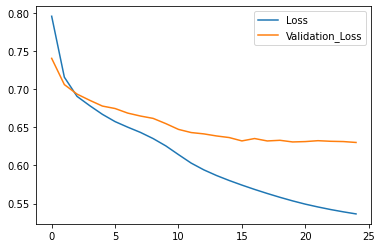

In [14]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation_Loss')
plt.legend()